In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [5]:
# load dataset found on Kaggle

data = pd.read_csv('creditcard.csv')

In [6]:
# read first few rows of data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# check dataset column info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# check for any null values

data.isnull().values.any()

False

In [9]:
# check options in Class column

data['Class'].unique()

array([0, 1])

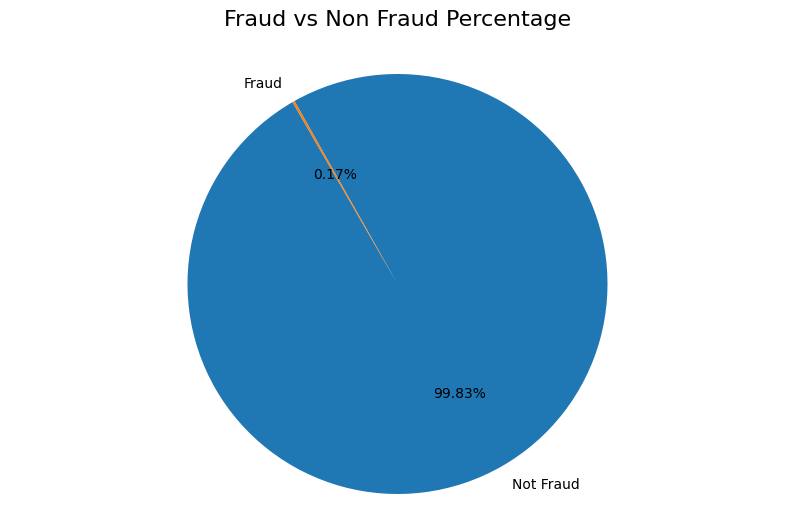

In [13]:
# visualize data using pie chart

labels = 'Not Fraud', 'Fraud'
sizes = [data.Class[data['Class'] == 0].count(), data.Class[data['Class'] == 1].count()]
fig1, ax1 = plt.subplots(figsize = (10,6))
ax1.pie(sizes, labels = labels, autopct='%1.2f%%', shadow = False, startangle = 120)
ax1.axis('equal')
title = "Fraud vs Non Fraud Percentage"
plt.title(title, size=16, pad=20)
plt.show()

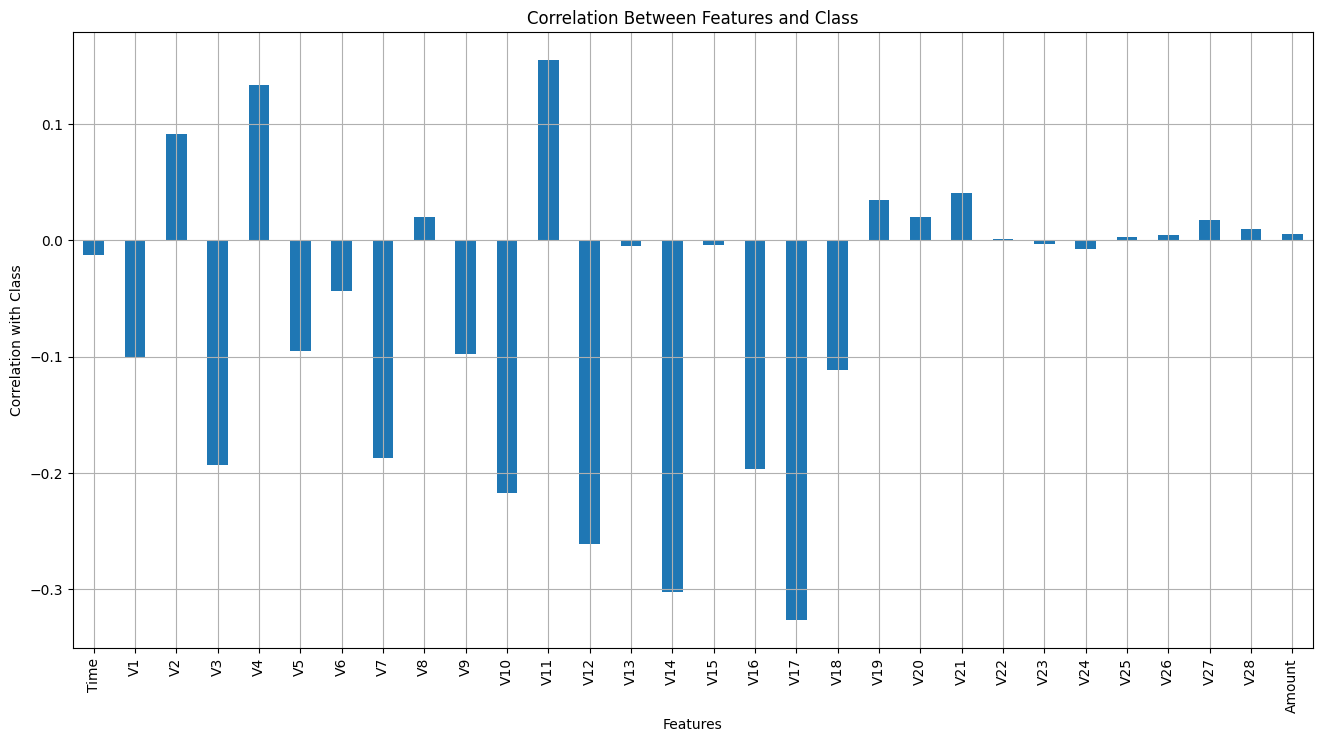

In [14]:
# visualize correlation between each column in dataset and 'Class' column

data_2 = data.drop(columns=['Class'])
class_correlation = data_2.corrwith(data['Class'])
class_correlation.plot.bar(figsize = (16, 8), grid = True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation Between Features and Class")
plt.show()

In [15]:
# split data into features (x) and target variable (y)

x = data.drop(columns=['Class'])
y = data['Class']

In [17]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
# scale the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Logistic Regression Classification

from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)

In [22]:
# train the model

classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [23]:
# make the predictions

y_pred = classifier_lr.predict(x_test)

In [24]:
# calculate metrics to observe model performance

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [27]:
results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663


In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56852,     9],
       [   37,    64]])

In [29]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state = 0)

In [30]:
# train the model

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
# make the predictions

y_pred = classifier_rf.predict(x_test)

In [32]:
# calculate metrics to observe model performance

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [33]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663
1,Random Forest,0.999491,0.844920,0.918605,0.782178


In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56854,     7],
       [   22,    79]])

In [37]:
# XGBClassifier from XGBoost Library

from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(random_state = 0)

In [40]:
# train the model

classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [41]:
# make the predictions

y_pred = classifier_xgb.predict(x_test)

In [42]:
# calculate metrics to observe model performance

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [43]:
model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663
1,Random Forest,0.999491,0.844920,0.918605,0.782178
2,XGBoost,0.999614,0.884211,0.943820,0.831683


In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56856,     5],
       [   17,    84]])

In [45]:
# function to help make predictions on data using models

def predict_row(index, model, scaler):
    features = data.columns.tolist()[:-1]
    observation = pd.DataFrame([data.loc[index, features]])
    observation_scaled = scaler.transform(observation)
    prediction = model.predict(observation_scaled)
    return prediction[0]

In [55]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
print(predict_row(2, classifier_xgb, sc))

0


In [52]:
frauds = data[data['Class'] == 1].head()
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [54]:
print(predict_row(541, classifier_xgb, sc))

1


In [56]:
print(predict_row(623, classifier_xgb, sc))

0


In [57]:
print(predict_row(4920, classifier_xgb, sc))

0


In [58]:
print(predict_row(6108, classifier_xgb, sc))

1


In [59]:
print(predict_row(6329, classifier_xgb, sc))

1
